# Task 3: To Explore Unsupervised Machine Learning
* By Naveen Kamal P V

* From the given ‘Iris’ dataset, predict the optimum number ofclusters and represent it visually.
### Import the relevant libraries

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
%matplotlib inline
sns.set()

### Load the data set

In [38]:
iris = datasets.load_iris()
iris_data = pd.DataFrame(iris.data, columns = iris.feature_names)

### View the dataset

In [39]:
iris_data.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Describe the dataset

In [40]:
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Visualize the relationship between features

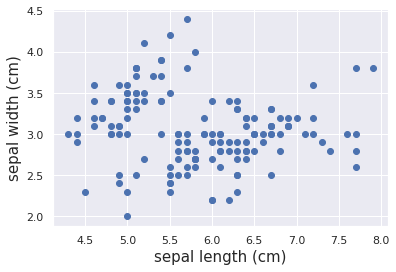

In [41]:
plt.scatter(x = 'sepal length (cm)', y = 'sepal width (cm)', data = iris_data)
plt.xlabel('sepal length (cm)', fontsize=15)
plt.ylabel('sepal width (cm)', fontsize=15)
plt.show()

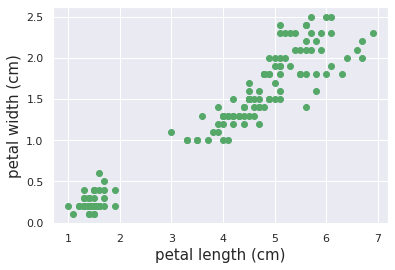

In [42]:
plt.scatter(x = 'petal length (cm)', y = 'petal width (cm)', data = iris_data, color='g')
plt.xlabel('petal length (cm)', fontsize=15)
plt.ylabel('petal width (cm)', fontsize=15)
plt.show()


# Using Elbow method to find k

In [43]:
wcss=[]
k_range=10
for i in range(1,k_range):
    k=KMeans(i)
    k.fit(iris_data)
    w=k.inertia_
    wcss.append(w)
wcss

[681.3706,
 152.34795176035792,
 78.85144142614601,
 57.228473214285714,
 46.44618205128205,
 39.066035353535355,
 34.420191786283894,
 29.98894395078606,
 28.160020334928234]

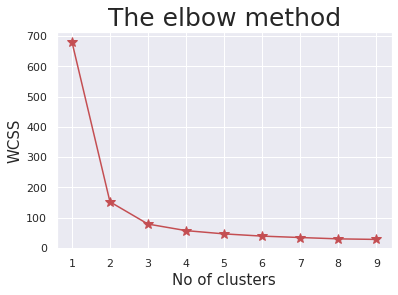

In [44]:
clusters=range(1,k_range)
plt.plot(clusters,wcss,  marker='*', color = "r", markersize=10)
plt.xlabel('No of clusters', fontsize=15)
plt.ylabel('WCSS', fontsize=15)
plt.title('The elbow method', fontsize=25)
plt.show()

# K= 2 clusters

In [45]:
kmeans_2=KMeans(2)
kmeans_2.fit(iris_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [46]:
iris_pred_2=iris_data.copy()
iris_pred_2['predicted']=kmeans_2.fit_predict(iris_data)

### Visualizing clusters according to predicted values

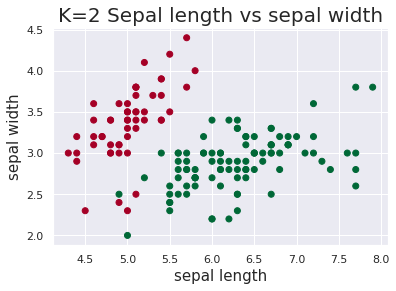

In [47]:
plt.scatter(x='sepal length (cm)', y='sepal width (cm)', c='predicted', cmap = 'RdYlGn', data=iris_pred_2)
plt.xlabel('sepal length', fontsize=15)
plt.ylabel('sepal width', fontsize=15)
plt.title('K=2 Sepal length vs sepal width', fontsize=20)
plt.show()

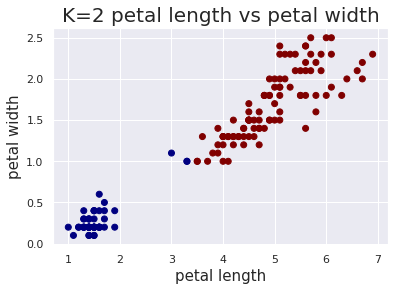

In [48]:
plt.scatter(x='petal length (cm)', y='petal width (cm)', c='predicted', cmap = 'jet', data=iris_pred_2)
plt.xlabel('petal length', fontsize=15)
plt.ylabel('petal width', fontsize=15)
plt.title('K=2 petal length vs petal width', fontsize=20)
plt.show()

# K=3 clusters

In [49]:
kmeans_3=KMeans(3)
kmeans_3.fit(iris_data)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [50]:
iris_pred_3=iris_data.copy()
iris_pred_3['predicted']=kmeans_3.fit_predict(iris_data)

# Visualizing clusters according to predicted values

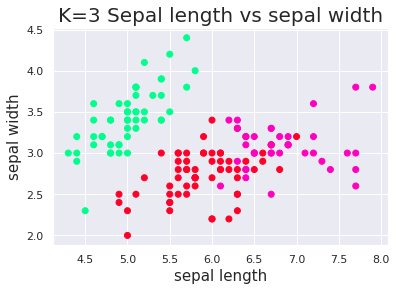

In [51]:
plt.scatter(x='sepal length (cm)', y='sepal width (cm)', c='predicted', cmap = 'gist_rainbow', data=iris_pred_3)
plt.xlabel('sepal length', fontsize=15)
plt.ylabel('sepal width', fontsize=15)
plt.title('K=3 Sepal length vs sepal width', fontsize=20)
plt.show()

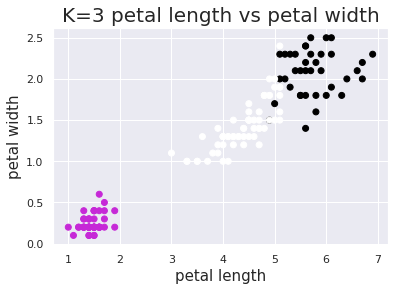

In [52]:
plt.scatter(x='petal length (cm)', y='petal width (cm)', c='predicted', cmap = 'gnuplot2_r', data=iris_pred_3)
plt.xlabel('petal length', fontsize=15)
plt.ylabel('petal width', fontsize=15)
plt.title('K=3 petal length vs petal width', fontsize=20)
plt.show()

# Visualizing clusters for true label values

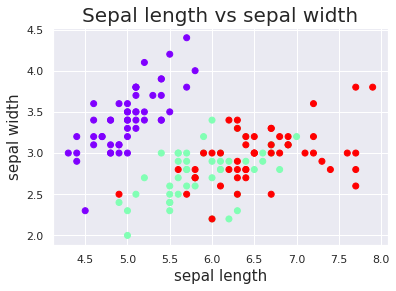

In [53]:
plt.scatter(x='sepal length (cm)', y='sepal width (cm)', c=iris.target, cmap = 'rainbow', data=iris_data)
plt.xlabel('sepal length', fontsize=15)
plt.ylabel('sepal width', fontsize=15)
plt.title('Sepal length vs sepal width', fontsize=20)
plt.show()

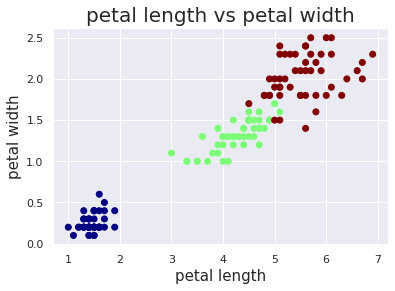

In [54]:
plt.scatter(x='petal length (cm)', y='petal width (cm)', c=iris.target, cmap = 'jet', data=iris_data)
plt.xlabel('petal length', fontsize=15)
plt.ylabel('petal width', fontsize=15)
plt.title('petal length vs petal width', fontsize=20)
plt.show()

Note: Visualizing the clusters for true labels ,we can say K=3 is more appropriate solution for iris dataset.
Examining the scatter plots (petal length vs petal width) and (sepal length vs sepal width), we observe the features that differentiate the species better are petals features and not sepals feature

Thus KMeans is better suited for problems where the number of clusters are already known.